In [37]:
import sys
import aa_py
%matplotlib inline
%load_ext autoreload
%autoreload 2
from orbit import *
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from run_2comp_cluster_vmaxuniversal import generate_simproperties
s, pmmag, ca = 2., 0.1, 1.0
simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5)

eq = crater2_eq()
solar_reflex = crater2_solarreflex()
pm = np.array([pmmag,0.])+solar_reflex
Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

# info = json.load(open('/data/jls/m2m/CraterII/fixed_veldisp_10_c20/2comp_cuspplum_nfw_SP_2_PM_-18_-14_ca_10.simlog'))

rs_nfw=simprops['Rscale']
c = simprops['c']
Delta=simprops['Delta']
from nbody_tools import Mvir_NFW, Vmax_NFW

print Mvir_NFW(rs_nfw,c,Delta=Delta)/3.7e9
print Vmax_NFW(rs_nfw,c,Delta=Delta)

R,T = integrate_orbits_backwards(Eq)

print pericentre(R),apocentre(R),count_pericentres(R)
print tidal_radius(pericentre(R),rs_nfw,c=c,Delta=Delta)
print tidal_radius(apocentre(R),rs_nfw,c=c,Delta=Delta)
print mass_loss(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)
print mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)
print penarrubia_tracks(mass_loss(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta))[0]
print period(R,T)

data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.)))
# print 'PROBLEM WITH DATAFLAT'
# data_flat = data.copy()
data_flat = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.)))

Scale radius = 0.725
Softening = 0.0515715008184
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53893727]
Tidal radius =  9.28130148139
Time unit:  0.17742722462
Mass fraction inside r_s =  0.079619632505
400000.0
Velocity dispersion =  12.657029553
0.178706332835
0.356132538035
20.0979727798
12.9933697289 131.131965057 7
0.635587156247
9.28480806695
0.0516575117741
0.0516575117741
0.227282889312
1.8338791339


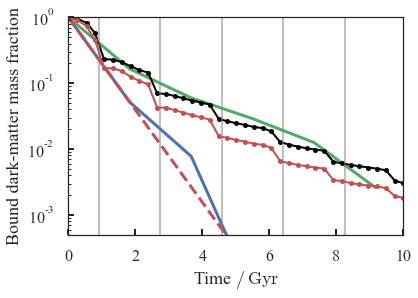

In [39]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
             for NN in nn],lw=3)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R)*1.8,apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
             for NN in nn],lw=3)
plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
                                   Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(5e-4,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm']/data['mass_dm'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm']/data_flat['mass_dm'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

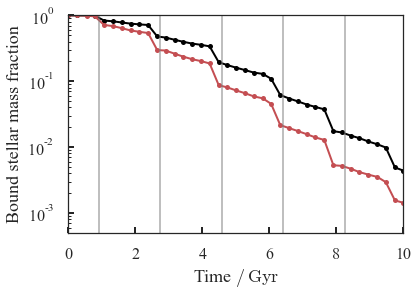

In [40]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
# plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
#              for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(5e-4,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_st']/data['mass_st'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_st']/data_flat['mass_st'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound stellar mass fraction')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

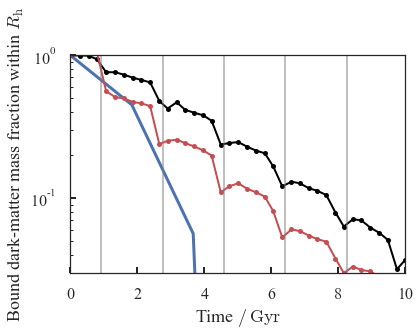

In [41]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(0.03,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm_core']/data['mass_dm_core'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm_core']/data_flat['mass_dm_core'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction within $R_\mathrm{h}$')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

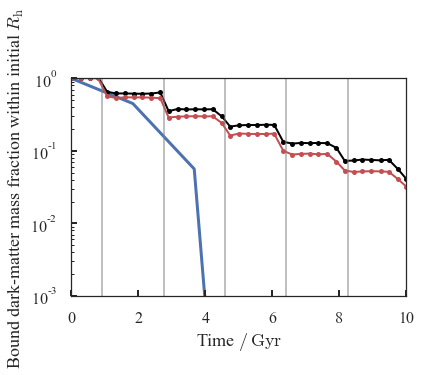

In [42]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(1e-3,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm_core_init']/data['mass_dm_core_init'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction within initial $R_\mathrm{h}$')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

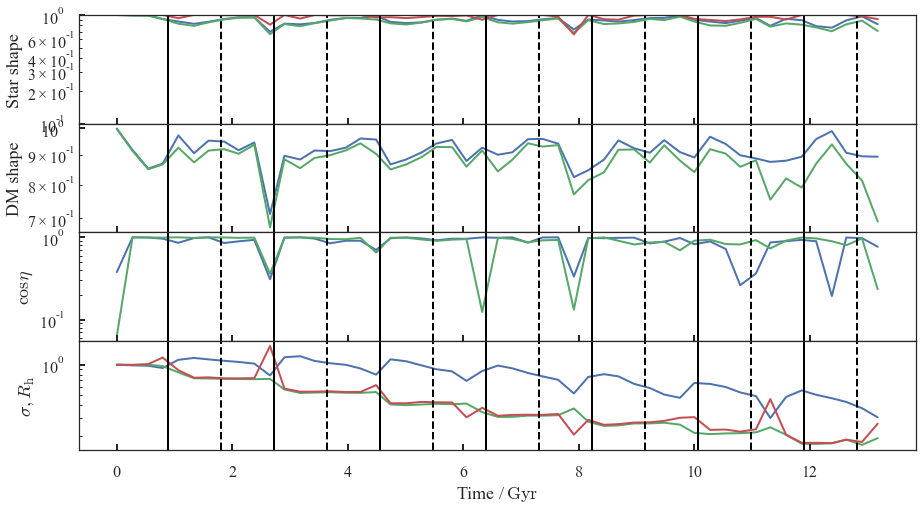

In [43]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data['times'],data['ba_st']);plt.semilogy()
plt.plot(data['times'],data['ca_st']);plt.semilogy()
plt.plot(data['times'],1.-data['eps']);plt.semilogy()
plt.ylabel('Star shape')
plt.ylim(0.1,1.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data['times'],data['ba_dm']);plt.semilogy()
plt.plot(data['times'],data['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel('DM shape')
plt.sca(a[2])
plt.plot(data['times'],data['align_dm']);plt.semilogy()
plt.plot(data['times'],data['align_st']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\cos\eta$')
plt.sca(a[3])
plt.plot(data['times'],data['r_half']/data['r_half'][0]);plt.semilogy()
plt.plot(data['times'],data['sig_maj']/data['sig_maj'][0]);plt.semilogy()
plt.plot(data['times'],data['sig_proj']/data['sig_proj'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\sigma,R_\mathrm{h}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')
plt.savefig('pmmag_10_properties_time.pdf',bbox_inches='tight')

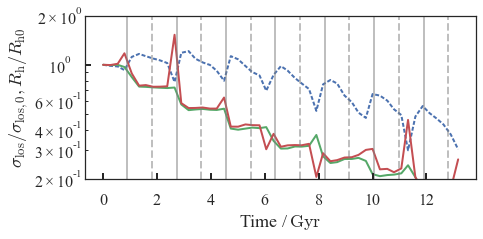

In [44]:
f,a=plt.subplots(figsize=[7.,3.])
l,=plt.plot(data['times'],data['r_half']/data['r_half'][0],lw=2,ls='dashed');
l.set_dashes((2,1))
plt.plot(data['times'],data['sig_maj']/data['sig_maj'][0],lw=2);
plt.plot(data['times'],data['sig_proj']/data['sig_proj'][0],lw=2);
plt.semilogy()
[plt.axvline(v,color='gray',alpha=0.5) for v in peri_times(R,T)]
[plt.axvline(v,color='gray',ls='dashed',alpha=0.5) for v in apo_times(R,T)];
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0},R_\mathrm{h}/R_\mathrm{h0}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')
plt.ylim(0.2,2.)
plt.savefig('pmmag_10_beating.pdf',bbox_inches='tight')

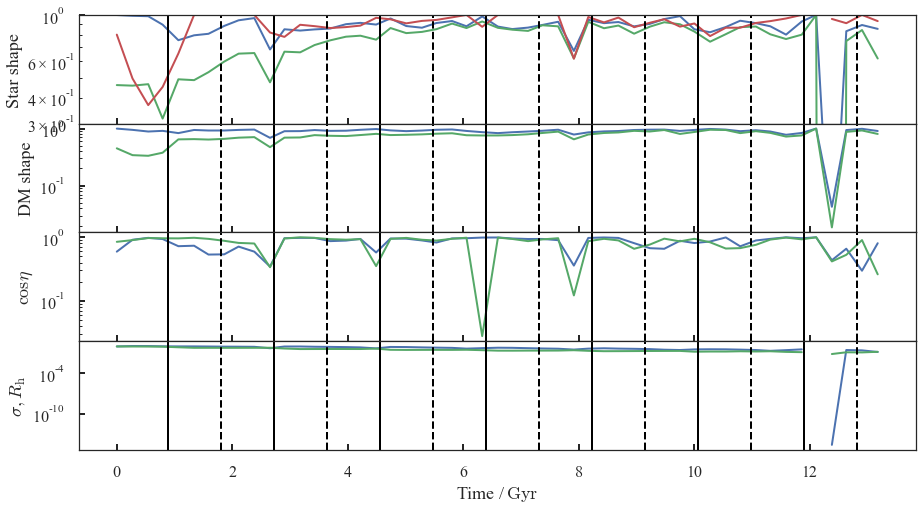

In [45]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data_flat['times'],data_flat['ba_st']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['ca_st']);plt.semilogy()
plt.plot(data_flat['times'],1.-data_flat['eps']);plt.semilogy()
plt.ylabel('Star shape')
plt.ylim(0.3,1.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data_flat['times'],data_flat['ba_dm']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel('DM shape')
plt.sca(a[2])
plt.plot(data_flat['times'],data_flat['align_dm']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['align_st']);plt.semilogy()
plt.ylabel(r'$\cos\eta$')
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[3])
plt.plot(data_flat['times'],data_flat['r_half']/data_flat['r_half'][0]);plt.semilogy()
plt.plot(data_flat['times'],data_flat['sig_maj']/data_flat['sig_maj'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\sigma,R_\mathrm{h}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')

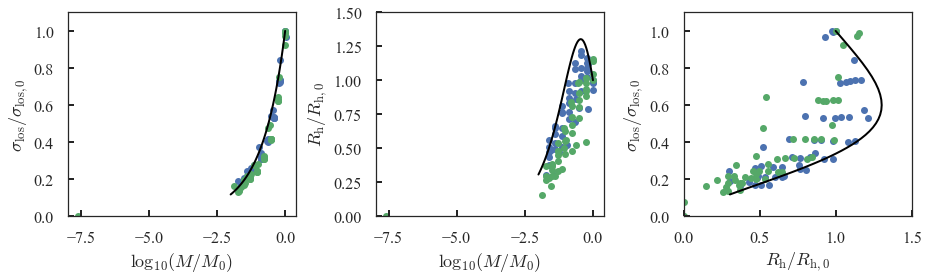

In [46]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core_init']/data['mass_dm_core_init'][0]),data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0]),
         data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core_init']/data['mass_dm_core_init'][0]),data['r_half']/data['r_half'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0]),
         data_flat['r_half']/data_flat['r_half'][0],'.')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.5)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half']/data['r_half'][0],data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(data_flat['r_half']/data_flat['r_half'][0],data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
plt.xlim(0.,1.5)
plt.ylim(0.,1.1)
plt.tight_layout()

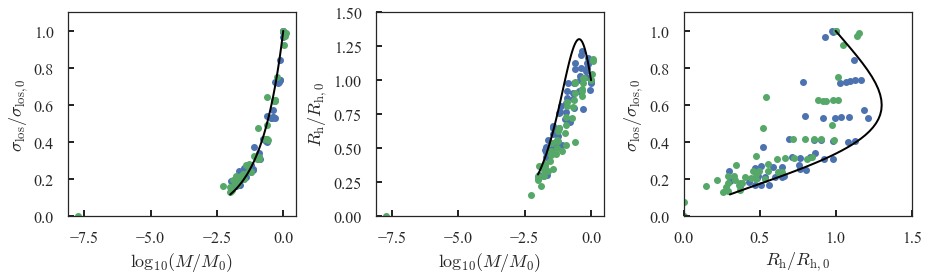

In [47]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['r_half']/data['r_half'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['r_half']/data_flat['r_half'][0],'.')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.5)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half']/data['r_half'][0],data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(data_flat['r_half']/data_flat['r_half'][0],data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
plt.xlim(0.,1.5)
plt.ylim(0.,1.1)
plt.tight_layout()

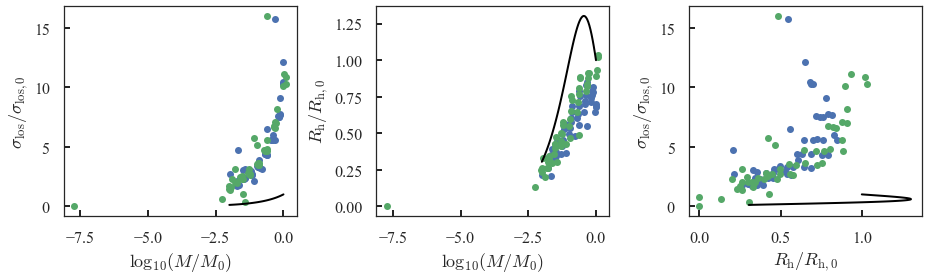

In [48]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['sig_proj'],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['sig_proj'],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
# plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['r_half'],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['r_half'],'.')
xx = np.logspace(-2.,0.)
# plt.ylim(0.,1.4)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half'],data['sig_proj'],'.')
plt.plot(data_flat['r_half'],data_flat['sig_proj'],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
plt.tight_layout()

[]

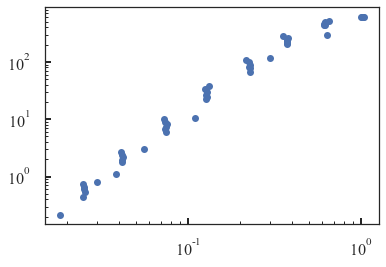

In [69]:
plt.plot(data['mass_dm_core_init']/data['mass_dm_core_init'][0],
         data['mass_dm_core_init'][0]/(0.5*data['mass_st'][0]/(data['mass_st']/1.5e5)),'.')
# plt.plot(data['mass_dm_core_init']/data['mass_dm_core_init'][0],
#          data['mass_dm_core'],'.')
plt.semilogy();plt.semilogx()

[]

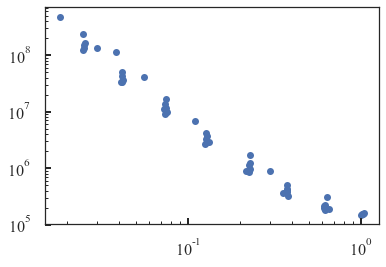

In [86]:
plt.plot(data['mass_dm_core_init']/data['mass_dm_core_init'][0],
         2.*data['mass_st_core'][0]/(data['mass_st_core']/1.5e5*2.),'.')
# plt.plot(data['mass_dm_core_init']/data['mass_dm_core_init'][0],
#          data['mass_st_core_init'][0]/(data['mass_st_core_init']/1.5e5),'.')
plt.semilogx()
plt.semilogy()

[]

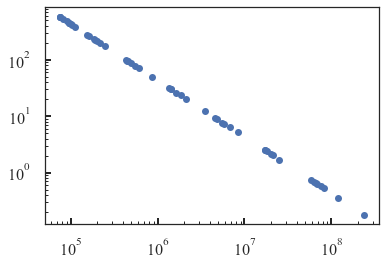

In [84]:
plt.plot(data['mass_st_core'][0]/(data['mass_st_core']/1.5e5*2.),
         data['mass_dm_core'][0]/(data['mass_st_core'][0]/(data['mass_st_core']/1.5e5*2.)),'.')
plt.semilogx()
plt.semilogy()

In [85]:
g = np.genfromtxt('mass_samples.dat')
from scipy.stats import kde
KDE = kde.gaussian_kde(g)